In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open("London Station List.pkl", 'rb') as f:
    station_list = pickle.load(f)


with open("restored converted matrix.pkl",'rb') as f:
    converted_matrix = pickle.load(f)
    
    
# Load Excel files into dataframes
df_origin_destination = pd.read_excel('Origin-destination matrix by station-zone-time of day 2017.xls')

# Strip leading and trailing spaces
df_origin_destination['origin'] = df_origin_destination['Unnamed: 1'].str.strip()
df_origin_destination['destination'] = df_origin_destination['Unnamed: 3'].str.strip()


ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [26]:
df_origin_destination.iloc[3:10]


,RODS report3 created at 11:25:59 on 16-02-2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,origin,destination
3,500,Acton Town,505,Alperton,0,44,0,93,0,0,137,Acton Town,Alperton
4,500,Acton Town,506,Amersham,0,0,0,20,0,0,20,Acton Town,Amersham
5,500,Acton Town,507,Angel,1,13,5,0,3,0,22,Acton Town,Angel
6,500,Acton Town,508,Archway,0,0,0,0,0,4,4,Acton Town,Archway
7,500,Acton Town,510,Arsenal,0,0,12,17,0,0,29,Acton Town,Arsenal
8,500,Acton Town,511,Baker Street,0,15,0,0,0,0,15,Acton Town,Baker Street
9,500,Acton Town,513,Bank / Monument,106,111,5,0,0,0,222,Acton Town,Bank / Monument


In [33]:
# Define the replacements dictionary
replacements = {
    "Amersham": np.nan,
    "Bank / Monument": "Bank & Monument",
    "Buckhurst Hill": np.nan,
    "Chalfont & Latimer": np.nan,
    "Chesham": np.nan,
    "Chorleywood": np.nan,
    "Debden": np.nan,
    "Edgware Road (Bak)": "Edgware Road (B)",
    "Edgware Road (Cir)": "Edgware Road (C)",
    "Epping": np.nan,
    "Hammersmith (Dis)": "Hammersmith",
    "Hammersmith (H&C)": "Hammersmith",
    "Heathrow Terminal 4": np.nan,
    "Heathrow Terminal 5": np.nan,
    "Heathrow Terminals 123": np.nan,
    "Kensington (Olympia)": np.nan,
    "Loughton": np.nan,
    "Rickmansworth": np.nan,
    "Shepherd's Bush (Cen)": "Shepherd's Bush",
    "Theydon Bois": np.nan,
    "Watford": np.nan,
    "Wood Lane": "White City"
}

# Apply the replacements to the specified columns
df_origin_destination['origin'] = df_origin_destination['origin'].replace(replacements)
df_origin_destination['destination'] = df_origin_destination['destination'].replace(replacements)
df_origin_destination['Total'] = df_origin_destination['Unnamed: 10']

# Drop rows where any of the specified columns have NaN values
df_origin_destination.dropna(subset=['origin', 'destination'], inplace=True)




data = df_origin_destination[['origin', 'destination', 'Total']]

# Display the first few rows of the modified dataframe to verify
df_origin_destination.iloc[3:10]

,RODS report3 created at 11:25:59 on 16-02-2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,origin,destination,Total
7,500,Acton Town,510,Arsenal,0,0,12,17,0,0,29,Acton Town,Arsenal,29
8,500,Acton Town,511,Baker Street,0,15,0,0,0,0,15,Acton Town,Baker Street,15
9,500,Acton Town,513,Bank / Monument,106,111,5,0,0,0,222,Acton Town,Bank & Monument,222
10,500,Acton Town,501,Barbican,0,9,0,0,0,0,9,Acton Town,Barbican,9
11,500,Acton Town,516,Barons Court,5,25,22,0,0,0,52,Acton Town,Barons Court,52
12,500,Acton Town,517,Bayswater,0,0,0,11,0,0,11,Acton Town,Bayswater,11
13,500,Acton Town,787,Bermondsey,0,0,0,6,0,0,6,Acton Town,Bermondsey,6


In [34]:
data

,origin,destination,Total
3,Acton Town,Alperton,137
5,Acton Town,Angel,22
6,Acton Town,Archway,4
7,Acton Town,Arsenal,29
8,Acton Town,Baker Street,15
...,...,...,...
34307,Woodside Park,Waterloo,137
34308,Woodside Park,West Brompton,2
34309,Woodside Park,West Finchley,28
34310,Woodside Park,Westminster,41


In [35]:
table_os = list(data['origin'].unique())
table_ds = list(data['destination'].unique())

for station in table_ds:
    if station not in station_list:
        print(station)

In [36]:
# Create a list to hold the rows
result = []

# Iterate through the rows of the dataframe
for index, row in data.iterrows():
    # Extract the values from the specified columns
    value1 = row['origin']
    value3 = row['destination']
    value10 = row['Total']
    
    # Append the values as a new row in the result list
    result.append([value1, value3, value10])

# Convert the result list to a numpy array
result_array = np.array(result)

# Display the result array
print(result_array)

[['Acton Town' 'Alperton' '137']
 ['Acton Town' 'Angel' '22']
 ['Acton Town' 'Archway' '4']
 ...
 ['Woodside Park' 'West Finchley' '28']
 ['Woodside Park' 'Westminster' '41']
 ['Woodside Park' 'White City' '31']]


In [37]:
new_travel_matrix = np.zeros((251,251))

for value in result_array:
    s1 = station_list.index(value[0])
    s2 = station_list.index(value[1])
    
    new_travel_matrix[s1][s2] += int(value[2])

In [74]:
dlr_travel_matrix = np.zeros((333,333))

for value in result_array:
    s1 = station_list.index(value[0])
    s2 = station_list.index(value[1])
    
    dlr_travel_matrix[s1][s2] += int(float(value[2]))

In [76]:
np.sum(dlr_travel_matrix)

for i in range(333):
    for j in range(333):
        if new_travel_matrix[i][j] == 0 and dlr_travel_matrix[i][j] != 0:
            print(station_list[i],station_list[j],"\n")

In [55]:
with open("real_commuter_matrix.pkl", 'rb') as f:
    commuter_matrix = pickle.load(f)
    
np.sum(commuter_matrix)

434176.0009470752

In [54]:
np.sum(new_travel_matrix)

4770384.0

In [59]:
# Count the total number of zeros
zero_count = np.count_nonzero(new_travel_matrix == 0)

print("Total number of zeros:", zero_count)

Total number of zeros: 79635


'Harringay Green Lanes'

In [109]:
# Identify rows where all elements are zeros
zero_rows = np.where(np.all(full_travel_matrix == 0, axis=1))[0]
# Identify columns where all elements are zeros
zero_columns = np.where(np.all(full_travel_matrix == 0, axis=0))[0]

# Print the row and column numbers
print("Rows where the entire row is zeros:", zero_rows)
print("Columns where the entire column is zeros:", zero_columns)


Rows where the entire row is zeros: [124]
Columns where the entire column is zeros: [124]


In [112]:
# Define the threshold for zero elements (95%)
threshold = 0.95

# Identify rows where over 95% of the elements are zeros
zero_rows = np.where(np.mean(full_travel_matrix == 0, axis=1) > threshold)[0]

# Identify columns where over 95% of the elements are zeros
zero_columns = np.where(np.mean(full_travel_matrix == 0, axis=0) > threshold)[0]

# Print the row and column numbers
print("Rows where over 95% of the elements are zeros:", zero_rows)
print("Columns where over 95% of the elements are zeros:", zero_columns)


Rows where over 95% of the elements are zeros: [ 39  40  41  42  43  44  61  62  63  64  65  66  67  68  69  86  87  92
  93  94  95  98  99 100 101 102 103 117 124 125 135 136 171 172 173 174
 175 195 196 197 198 199 200 201 202 208 209 210 211 212 213 214 215 216
 217 218 220 226 227 250 251 252 253 254 255 256 257 258 260 261 262 263
 265 267 268 275 276 277 282 283 284]
Columns where over 95% of the elements are zeros: [ 39  40  41  42  43  44  61  62  63  64  65  66  67  68  69  86  87  92
  93  94  95  98  99 100 101 102 103 117 124 125 135 136 171 172 173 174
 195 196 197 198 199 200 201 202 208 209 210 211 212 213 214 215 216 217
 218 220 226 227 228 250 251 252 253 254 255 256 257 258 260 261 262 263
 265 267 268 275 276 277 282 283 284]


In [113]:
for i in zero_rows:
    print(station_list[i])

Brondesbury
Brondesbury Park
Kensal Rise
Penge West
Crystal Palace
Anerley
Camden Road
Kentish Town West
Gospel Oak
Hampstead Heath
Finchley Road & Frognal
South Hampstead
Kilburn High Road
Norwood Junction
West Croydon
Acton Central
South Acton
Greenwich
Deptford Bridge
Cutty Sark for Maritime Greenwich
Woolwich Arsenal
Hackney Wick
Homerton
Hackney Central
Dalston Kingsland
Haggerston
Hoxton
Imperial Wharf
Harringay Green Lanes
South Tottenham
Headstone Lane
Hatch End
Canonbury
Caledonian Road & Barnsbury
Upper Holloway
Crouch Hill
Kensington (Olympia)
Elverson Road
Lewisham
New Cross
New Cross Gate
Brockley
Honor Oak Park
Forest Hill
Sydenham
Beckton Park
Pudding Mill Lane
Pontoon Dock
Gallions Reach
Royal Albert
West Silvertown
King George V
Cyprus
Beckton
Prince Regent
Custom House for ExCel.
Royal Victoria
Wanstead Park
Woodgrange Park
Rotherhithe
Surrey Quays
West India Quay
All Saints
Devons Road
Mudchute
Poplar
Island Gardens
Langdon Park
East India
Crossharbour
Westferry
Sout

In [85]:
# with open("DLR stations.pkl",'wb') as f:
    # pickle.dump(sorted(dlr_stations),f)

In [84]:
sorted(dlr_stations)

['Acton Central',
 'All Saints',
 'Anerley',
 'Beckton',
 'Beckton Park',
 'Blackwall',
 'Brockley',
 'Brondesbury',
 'Brondesbury Park',
 'Caledonian Road & Barnsbury',
 'Camden Road',
 'Canonbury',
 'Clapham Junction',
 'Crossharbour',
 'Crouch Hill',
 'Crystal Palace',
 'Custom House for ExCel.',
 'Cutty Sark for Maritime Greenwich',
 'Cyprus',
 'Dalston Kingsland',
 'Deptford Bridge',
 'Devons Road',
 'East India',
 'Elverson Road',
 'Finchley Road & Frognal',
 'Forest Hill',
 'Gallions Reach',
 'Gospel Oak',
 'Greenwich',
 'Hackney Central',
 'Hackney Wick',
 'Haggerston',
 'Hampstead Heath',
 'Harringay Green Lanes',
 'Hatch End',
 'Headstone Lane',
 'Heron Quays',
 'Homerton',
 'Honor Oak Park',
 'Hoxton',
 'Imperial Wharf',
 'Island Gardens',
 'Kensal Rise',
 'Kensington (Olympia)',
 'Kentish Town West',
 'Kilburn High Road',
 'King George V',
 'Langdon Park',
 'Lewisham',
 'Leyton Midland Road',
 'Leytonstone High Road',
 'Limehouse',
 'Mudchute',
 'New Cross',
 'New Cross Gat

In [82]:
dlr_stations = []

for idx in zero_rows:
    dlr_stations.append(station_list[idx])
    print(station_list[idx])

Brondesbury
Brondesbury Park
Kensal Rise
Penge West
Crystal Palace
Anerley
Camden Road
Kentish Town West
Gospel Oak
Hampstead Heath
Finchley Road & Frognal
South Hampstead
Kilburn High Road
Norwood Junction
West Croydon
Acton Central
South Acton
Greenwich
Deptford Bridge
Cutty Sark for Maritime Greenwich
Woolwich Arsenal
Hackney Wick
Homerton
Hackney Central
Dalston Kingsland
Haggerston
Hoxton
Imperial Wharf
Harringay Green Lanes
South Tottenham
Headstone Lane
Hatch End
Canonbury
Caledonian Road & Barnsbury
Upper Holloway
Crouch Hill
Kensington (Olympia)
Elverson Road
Lewisham
New Cross
New Cross Gate
Brockley
Honor Oak Park
Forest Hill
Sydenham
Beckton Park
Pudding Mill Lane
Pontoon Dock
Gallions Reach
Royal Albert
West Silvertown
King George V
Cyprus
Beckton
Prince Regent
Custom House for ExCel.
Royal Victoria
Wanstead Park
Woodgrange Park
Rotherhithe
Surrey Quays
West India Quay
All Saints
Devons Road
Mudchute
Poplar
Island Gardens
Langdon Park
East India
Crossharbour
Westferry
Sout

In [39]:
np.sum(new_travel_matrix)

4769139.0

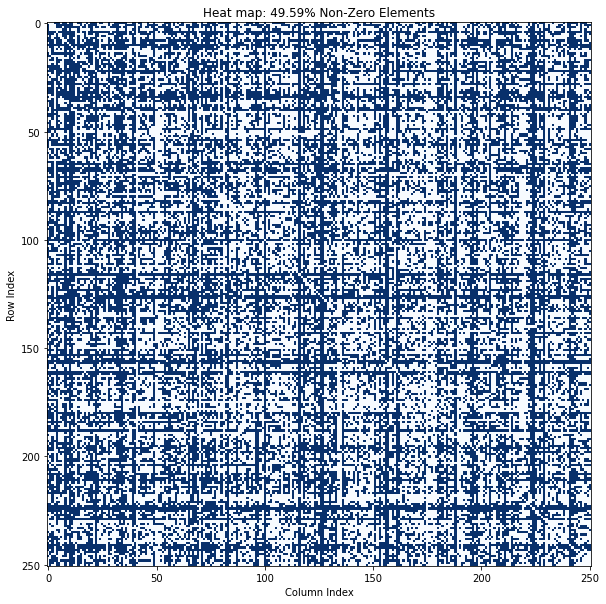

In [38]:
# Calculate the percentage of non-zero elements
non_zero_percentage = np.count_nonzero(new_travel_matrix) / new_travel_matrix.size * 100

# Create a mask for the zeros
zero_mask = (new_travel_matrix != 0)

# Create a figure and axis
plt.figure(figsize=(10, 10))

# Display the zero mask with a color map where zeros are colored (e.g., blue) and others are white
plt.imshow(zero_mask, cmap='Blues', interpolation='none')

# Add a title and axis labels
plt.title(f'Heat map: {non_zero_percentage:.2f}% Non-Zero Elements')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Show the plot
plt.show()

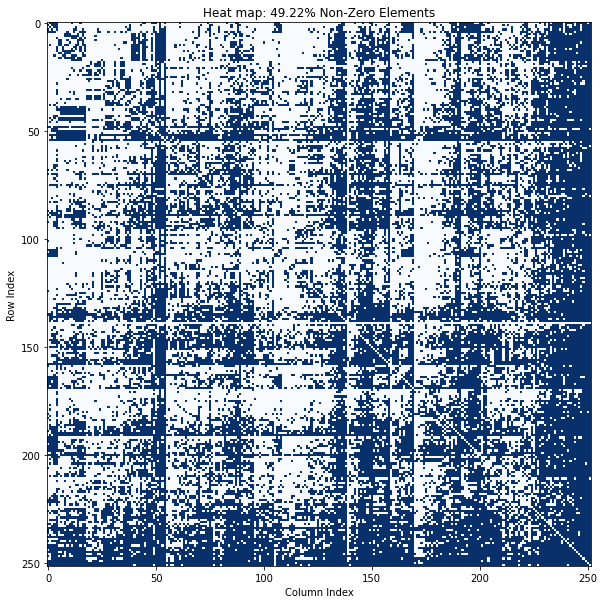

In [136]:
# Identify rows and columns that are completely zero
zero_rows = np.all(new_travel_matrix == 0, axis=1)
zero_columns = np.all(new_travel_matrix == 0, axis=0)

# Determine indices where both the row and column are zero
remove_indices = np.where(zero_rows & zero_columns)[0]

# Create a new matrix excluding those rows and columns
new_commuter_matrix = np.delete(new_travel_matrix, remove_indices, axis=0)
new_commuter_matrix = np.delete(new_commuter_matrix, remove_indices, axis=1)

# Calculate the percentage of non-zero elements in the new matrix
non_zero_percentage = np.count_nonzero(new_commuter_matrix) / new_commuter_matrix.size * 100

# Create a mask for the zeros
zero_mask = (new_commuter_matrix != 0)

# Create a figure and axis
plt.figure(figsize=(10, 10))

# Display the zero mask with a color map where zeros are colored (e.g., blue) and others are white
plt.imshow(zero_mask, cmap='Blues', interpolation='none')

# Add a title and axis labels
plt.title(f'Heat map: {non_zero_percentage:.2f}% Non-Zero Elements')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Show the plot
plt.show()

In [88]:
with open("dfl_travel1.pkl",'rb') as f:
    dfl_travel1 = pickle.load(f)
    
with open("dfl_travel2.pkl",'rb') as f:
    dfl_travel2 = pickle.load(f)
    
full_dfl_travel = dfl_travel1 + dfl_travel2

In [90]:
np.sum(full_dfl_travel)

442032.0

In [102]:
station_list[224]

'Canning Town'

In [104]:
count = 0
full_travel_matrix = new_travel_matrix.copy()

for i in range(333):
    for j in range(333):
        if new_travel_matrix[i][j] == 0 and full_dfl_travel[i][j] != 0:
            full_travel_matrix[i][j] += full_dfl_travel[i][j]


In [107]:
np.sum(full_travel_matrix)

5205064.0

In [56]:
count = 0

for i in range(333):
    for j in range(333):
        if i == j:
            count += new_travel_matrix[i][j]
            
count

0.0

In [70]:
for value in unique_values_column_3:
    if value not in station_list:
        print(value)

Bank / Monument
Hammersmith (H&C)
Wood Lane
Buckhurst Hill
Debden
Epping
Hammersmith (Dis)
Heathrow Terminal 5
Shepherd's Bush (Cen)
Watford
Edgware Road (Bak)
Heathrow Terminals 123
Chalfont & Latimer
Heathrow Terminal 4
Rickmansworth
Amersham
Chorleywood
Loughton
Chesham
Edgware Road (Cir)
Theydon Bois


In [ ]:
replacements = {
    "Bank / Monument": "Bank & Monument",
    "Buckhurst Hill": nan,
    "Chalfont & Latimer": nan,
    "Chesham": nan,
    "Chorleywood": nan,
    "Debden": nan,
    "Edgware Road (Bak)": "Edgware Road (B)",
    "Edgware Road (Cir)": "Edgware Road (C)",
    "Epping": nan,
    "Hammersmith (Dis)": "Hammersmith",
    "Hammersmith (H&C)": "Hammersmith",
    "Heathrow Terminal 4": nan,
    "Heathrow Terminal 5": nan,
    "Heathrow Terminals 123": nan,
    "Loughton": nan,
    "Rickmansworth": nan,
    "Shepherd's Bush (Cen)": "Shepherd's Bush",
    "Theyden Bois": nan,
    "Watford": nan,
    "Wood Lane": "White City"
}

In [9]:

df_nr_dlr_journeys.head()


,RODS report3 created at 11:25:59 on 16-02-2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,based on survey data up to 2017 and reconcile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Journeys originating on NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,From,NaN,To,NaN,Early,AM peak,Midday,PM Peak,Evening,Late,Weekday Total
3,NaN,NaN,NaN,NaN,- 7am,7am-10am,10am-4pm,4pm-7pm,7pm-10pm,10pm+,NaN
4,502,Aldgate,507,Angel,0,3,0,0,0,0,3
